# **Load + Basic Checks**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


import pandas as pd
import numpy as np

#  LOAD DATA
PATH = "/content/drive/MyDrive/Mental health social media data.csv"  # <--- Colab e upload korar por ei path use korো

df = pd.read_csv(PATH)

# clean column names
df.columns = [c.strip() for c in df.columns]

print("✅ Loaded dataset")
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))

print("\nFirst 3 rows:")
print(df.head(3))

# ---- 2) BUILD TEXT FIELD (Title + Content) ----
required_cols = ["Post Title", "Post Content", "Post Category"]
for c in required_cols:
    if c not in df.columns:
        raise ValueError(f"Missing required column: {c}")

df["Post Title"] = df["Post Title"].fillna("")
df["Post Content"] = df["Post Content"].fillna("")
df["text"] = (df["Post Title"] + " " + df["Post Content"]).astype(str).str.strip()

# ---- 3) LABEL DISTRIBUTION (Post Category) ----
label_col = "Post Category"
vc = df[label_col].value_counts(dropna=False)
pct = (vc / vc.sum() * 100).round(2)
label_summary = pd.DataFrame({"count": vc, "percent": pct})

print("\n📊 Label distribution (Post Category):")
print(label_summary)

# ---- 4) MISSING VALUES ----
print("\n🕳 Missing values per column (top 20):")
print(df.isna().sum().sort_values(ascending=False).head(20))

# ---- 5) TEXT LENGTH STATS ----
df["text_len_char"] = df["text"].astype(str).str.len()
df["text_len_word"] = df["text"].astype(str).str.split().str.len()

def p(s, q):
    return int(np.percentile(s, q)) if len(s) else None

print("\n✏ Text length (chars) percentiles:")
for q in [50, 75, 90, 95, 99]:
    print(f"p{q}:", p(df["text_len_char"], q))

print("\n✏ Text length (words) percentiles:")
for q in [50, 75, 90, 95, 99]:
    print(f"p{q}:", p(df["text_len_word"], q))

very_short = (df["text_len_word"] <= 3).sum()
print(f"\nVery short posts (<=3 words): {very_short}")

# ---- 6) DUPLICATE TEXT CHECK ----
dup_on_text = df.duplicated(subset=["text"]).sum()
print(f"\n🔁 Exact duplicate posts (same text): {dup_on_text}")

# ---- 7) USER & DATE SANITY CHECK ----
user_col = "User ID" if "User ID" in df.columns else None
date_col = "Post Date" if "Post Date" in df.columns else None

if user_col:
    nunique_users = df[user_col].nunique(dropna=True)
    posts_per_user = df[user_col].value_counts()
    def p2(v, q): return int(np.percentile(v, q)) if len(v) else None
    print(f"\n👤 Unique users: {nunique_users}")
    print("Posts per user percentiles:",
          {f"p{q}": p2(posts_per_user.values, q) for q in [50, 75, 90, 95, 99]})
    print("Top 5 users by #posts:\n", posts_per_user.head(5))

if date_col:
    dates = pd.to_datetime(df[date_col], errors="coerce", infer_datetime_format=True)
    min_d, max_d = dates.min(), dates.max()
    missing_dates = dates.isna().sum()
    print(f"\n📅 Date parse → min: {min_d}, max: {max_d}, missing: {missing_dates}")
    if not dates.isna().all():
        by_year = dates.dt.year.value_counts().sort_index()
        print("Posts by year:\n", by_year)

# ---- 8) PER-CLASS TEXT SAMPLES ----
print("\n🔍 Per-category sample posts (up to 2 per class):")
for cat in df[label_col].dropna().unique().tolist():
    print(f"\n=== Category: {cat} ===")
    sub = df[df[label_col] == cat].head(2)
    for i, row in sub.iterrows():
        preview = str(row["text"]).replace("\n", " ").strip()
        if len(preview) > 400:
            preview = preview[:400] + " ..."
        print("-", preview)

print("\n Load + sanity checks done.")


✅ Loaded dataset
Shape: (28200, 9)

Columns: ['Post ID', 'Thread URL', 'Post Title', 'Post Content', 'Post Author', 'User ID', 'Post Date', 'Post Category', 'Number of Comments']

First 3 rows:
   Post ID                                         Thread URL  \
0   607679  https://forums.beyondblue.org.au/t5/anxiety/hi...   
1   612274  https://forums.beyondblue.org.au/t5/anxiety/ge...   
2   612354  https://forums.beyondblue.org.au/t5/anxiety/st...   

                                          Post Title  \
0  Hi! Check out this post if you're not sure how...   
1        Generalised Anxiety disorder not going good   
2                           Struggling at the moment   

                                        Post Content Post Author  User ID  \
0  Hi there and welcome to the Anxiety section of...  BeyondBlue    54597   
1  Hi, my name is lily. I have no idea what else ...      Lil123    31240   
2  Hello everyone, this is my first post, so I ho...        Toby    55687   

     Post D

/tmp/ipython-input-3725245299.py:78: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dates = pd.to_datetime(df[date_col], errors="coerce", infer_datetime_format=True)
/tmp/ipython-input-3725245299.py:78: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(df[date_col], errors="coerce", infer_datetime_format=True)



📅 Date parse → min: NaT, max: NaT, missing: 28200

🔍 Per-category sample posts (up to 2 per class):

=== Category: Anxiety ===
- Hi! Check out this post if you're not sure how to start Hi there and welcome to the Anxiety section of the Forums First of all, thank you so much for joining us here. We think it’s amazing that you’ve taken this step to getting support and learning from this Community. You are very welcome here and we are really interested in what you might want to add to these conversations. We get it, having anx ...
- Generalised Anxiety disorder not going good Hi, my name is lily. I have no idea what else to do. My partner is amazing but can't help me in the way I need, and I don't have enough money for a therapist. My anxiety is severe, and it gets to the point where I have so much going on in my head that I break down and have an episode. My anxiety is always pretty bad but recently, due to me going back to  ...

=== Category: PTSD & Trauma ===
- PTSD for Medical and Fi

In [ ]:
df.head()

,Post ID,Thread URL,Post Title,Post Content,Post Author,User ID,Post Date,Post Category,Number of Comments,text,text_len_char,text_len_word
0,607679,https://forums.beyondblue.org.au/t5/anxiety/hi...,Hi! Check out this post if you're not sure how...,Hi there and welcome to the Anxiety section of...,BeyondBlue,54597,‎04-03-2025,Anxiety,NaN,Hi! Check out this post if you're not sure how...,1558,293
1,612274,https://forums.beyondblue.org.au/t5/anxiety/ge...,Generalised Anxiety disorder not going good,"Hi, my name is lily. I have no idea what else ...",Lil123,31240,NaN,Anxiety,NaN,Generalised Anxiety disorder not going good Hi...,1015,212
2,612354,https://forums.beyondblue.org.au/t5/anxiety/st...,Struggling at the moment,"Hello everyone, this is my first post, so I ho...",Toby,55687,NaN,Anxiety,NaN,"Struggling at the moment Hello everyone, this ...",760,142
3,612290,https://forums.beyondblue.org.au/t5/anxiety/st...,Stalker,I feel no one is supporting me. I have a stalk...,G-i-g-i,55697,NaN,Anxiety,NaN,Stalker I feel no one is supporting me. I have...,2922,559
4,612296,https://forums.beyondblue.org.au/t5/anxiety/ov...,overwhelmed,sorry if this is alot i just rlly need to get ...,Guest_87295139,55698,NaN,Anxiety,NaN,overwhelmed sorry if this is alot i just rlly ...,1386,263


# **Data Preprocessing Start**

In [ ]:
import pandas as pd

# ---------- STEP 0: make a working copy & keep key columns ----------

cols_keep = [
    "Post ID",
    "User ID",
    "Post Author",
    "Post Date",
    "Post Title",
    "Post Content",
    "Post Category",
    "Number of Comments",
]

df0 = df[cols_keep].copy()

# text field rebuild (just to be sure)
df0["Post Title"] = df0["Post Title"].fillna("")
df0["Post Content"] = df0["Post Content"].fillna("")
df0["text"] = (df0["Post Title"] + " " + df0["Post Content"]).astype(str).str.strip()

print("✅ Working copy shape:", df0.shape)
print("Unique Post Category:", df0["Post Category"].unique())


# ---------- STEP 1: define label mapping (multi-class + multi-label) ----------

# 1) primary TASK-focused label (for simple classification)
#    mapping tor kotha moto:
#    1 = Anxiety (incl. Social Anxiety)
#    2 = Depression
#    3 = Suicidal Thoughts / Self-harm
#    4 = Staying Well (healthy)
#    5 = Other (Relationship & Family Issues, PTSD & Trauma, etc.)

category_to_primary_name = {
    "Anxiety": "anxiety",
    "Social Anxiety": "anxiety",
    "Depression": "depression",
    "Suicidal Thoughts": "suicidal",
    "Suicidal Thoughts & Self-harm": "suicidal",
    "Staying Well": "healthy",
    "Relationship & Family Issues": "other",
    "PTSD & Trauma": "other",
}

primary_name_to_id = {
    "anxiety": 1,
    "depression": 2,
    "suicidal": 3,
    "healthy": 4,
    "other": 5,
}

# human-readable primary label
df0["primary_label_name"] = df0["Post Category"].map(category_to_primary_name).fillna("other")

# numeric primary label (1–5)
df0["primary_label_id"] = df0["primary_label_name"].map(primary_name_to_id).astype("int64")

# 2) multi-label flags for the 3 core conditions (for future multi-label setup)

df0["is_anxiety"] = df0["Post Category"].isin(["Anxiety", "Social Anxiety"]).astype(int)
df0["is_depression"] = (df0["Post Category"] == "Depression").astype(int)
df0["is_suicidal"] = df0["Post Category"].isin(
    ["Suicidal Thoughts", "Suicidal Thoughts & Self-harm"]
).astype(int)


# ---------- STEP 2: diagnostics / checking ----------

print("\n📊 Raw Post Category counts:")
print(df0["Post Category"].value_counts(dropna=False))

print("\n📊 primary_label_name counts:")
print(df0["primary_label_name"].value_counts())

print("\n📊 primary_label_id counts (1–5):")
print(df0["primary_label_id"].value_counts().sort_index())

print("\n🔍 Multi-label flag sums (how many posts per condition):")
print("Anxiety-related posts   :", df0["is_anxiety"].sum())
print("Depression-related posts:", df0["is_depression"].sum())
print("Suicidal-related posts  :", df0["is_suicidal"].sum())

# check overlap (ideally 0, karon ekta post ek category tei pore)
overlap_anx_dep = ((df0["is_anxiety"] == 1) & (df0["is_depression"] == 1)).sum()
overlap_anx_sui = ((df0["is_anxiety"] == 1) & (df0["is_suicidal"] == 1)).sum()
overlap_dep_sui = ((df0["is_depression"] == 1) & (df0["is_suicidal"] == 1)).sum()

print("\n🔁 Overlap between flags (should be 0 for this dataset):")
print("Anxiety & Depression overlap:", overlap_anx_dep)
print("Anxiety & Suicidal overlap  :", overlap_anx_sui)
print("Depression & Suicidal overlap:", overlap_dep_sui)

# suicidal categories duplicate check
print("\n🧪 Suicidal subcategories counts:")
print(df0[df0["primary_label_name"] == "suicidal"]["Post Category"].value_counts())

# small sample from each primary label to visually inspect
print("\n🔍 Sample posts per primary_label_name (1 example each):")
for label in ["anxiety", "depression", "suicidal", "healthy", "other"]:
    sub = df0[df0["primary_label_name"] == label].head(1)
    if sub.empty:
        print(f"\n=== {label.upper()} === (no samples)")
        continue
    row = sub.iloc[0]
    print(f"\n=== {label.upper()} ===")
    print("Post Category:", row["Post Category"])
    print("Post Author  :", row["Post Author"])
    preview = str(row["text"]).replace("\n", " ").strip()
    if len(preview) > 400:
        preview = preview[:400] + " ..."
    print("Text preview :", preview)

print("\n✅ Step 1 + 2 (label mapping + basic checks) done on df0")


✅ Working copy shape: (28200, 9)
Unique Post Category: ['Anxiety' 'PTSD & Trauma' 'Relationship & Family Issues'
 'Suicidal Thoughts & Self-harm' 'Social Anxiety' 'Staying Well'
 'Suicidal Thoughts' 'Depression']

📊 Raw Post Category counts:
Post Category
Relationship & Family Issues     7576
Anxiety                          7511
Depression                       6618
PTSD & Trauma                    2062
Staying Well                     1772
Suicidal Thoughts & Self-harm    1316
Suicidal Thoughts                1316
Social Anxiety                     29
Name: count, dtype: int64

📊 primary_label_name counts:
primary_label_name
other         9638
anxiety       7540
depression    6618
suicidal      2632
healthy       1772
Name: count, dtype: int64

📊 primary_label_id counts (1–5):
primary_label_id
1    7540
2    6618
3    2632
4    1772
5    9638
Name: count, dtype: int64

🔍 Multi-label flag sums (how many posts per condition):
Anxiety-related posts   : 7540
Depression-related posts: 661

## **Staff/Moderator + Guideline Post Detection (inspection only)**

In [ ]:
import pandas as pd
import re

print("Current shape of df0:", df0.shape)
print("Columns:", df0.columns.tolist())

# ---------- 3.1 Top authors by #posts (to see who is very active) ----------

author_counts = df0["Post Author"].value_counts(dropna=False)
print("\n👤 Top 30 authors by #posts:")
print(author_counts.head(30))


# ---------- 3.2 Heuristic: candidate staff / moderator authors ----------

# patterns jeigula staff/moderator er moddhe thakar chance beshi
staff_patterns = [
    "beyond",      # BeyondBlue
    "blue",        # Beyond Blue variants
    "mod",         # Mod, Moderator, etc.
    "team",        # Team_BB, CommunityTeam, etc.
    "manager",
    "bb",          # BB_Community etc.
    "support",     # Support team names
]

author_series = df0["Post Author"].astype(str)

staff_mask = author_series.str.lower().str.contains(
    "|".join(staff_patterns), na=False
)

candidate_staff_authors = author_series[staff_mask].value_counts()

print("\n👥 Candidate staff/moderator authors (pattern-based, top 30):")
print(candidate_staff_authors.head(30))

print("\nTotal unique candidate staff authors:", candidate_staff_authors.shape[0])


# ---------- 3.3 Sample posts from candidate staff authors ----------

print("\n🔍 Sample posts from candidate staff authors (up to 3 authors × 2 posts):")

for author in candidate_staff_authors.head(3).index:
    sub = df0[df0["Post Author"] == author].head(2)
    print(f"\n=== AUTHOR: {author} | #posts: {author_counts[author]} ===")
    for i, row in sub.iterrows():
        preview = str(row["text"]).replace("\n", " ").strip()
        if len(preview) > 350:
            preview = preview[:350] + " ..."
        print(f"- Post Category: {row['Post Category']}")
        print("  Preview      :", preview)


# ---------- 3.4 Guideline / intro post heuristic (text-based) ----------

guideline_keywords = [
    "read this first",
    "read this if you're not sure",
    "welcome to the anxiety section",
    "welcome to the depression section",
    "welcome to the relationships and family",
    "this section of the beyond blue forums",
    "this is the relationships and family section",
    "posting in this section",
    "please read this first",
    "please read before posting",
    "do you have a safety plan",
    "life gets pretty hard sometimes",
    "check out this post if you're not sure how to start",
    "beyond burnout webinar",
    "this section is here to help",
    "what this section is all about",
]

# normalize text to lower for matching (temporarily)
text_lower = df0["text"].astype(str).str.lower()

pattern_guideline = "|".join([re.escape(k) for k in guideline_keywords])

df0["is_guideline_text"] = text_lower.str.contains(pattern_guideline, na=False)

print("\n📌 Guideline text flag counts:")
print(df0["is_guideline_text"].value_counts())

print("\n📌 Cross-tab: primary_label_name vs is_guideline_text")
print(pd.crosstab(df0["primary_label_name"], df0["is_guideline_text"]))


# ---------- 3.5 Show some example guideline posts ----------

print("\n🔍 Example posts flagged as guideline_text (up to 5):")

guideline_examples = df0[df0["is_guideline_text"]].head(5)

for i, row in guideline_examples.iterrows():
    preview = str(row["text"]).replace("\n", " ").strip()
    if len(preview) > 400:
        preview = preview[:400] + " ..."
    print("\n=== GUIDELINE POST ===")
    print("Post Author :", row["Post Author"])
    print("Post Category:", row["Post Category"])
    print("primary_label_name:", row["primary_label_name"])
    print("Preview:", preview)


print("\n✅ Step 3 inspection done (no rows dropped yet).")
print("You can now inspect:")
print("- Top authors")
print("- Candidate staff authors")
print("- How many guideline_text posts")
print("- Which labels they mostly belong to")


Current shape of df0: (28200, 14)
Columns: ['Post ID', 'User ID', 'Post Author', 'Post Date', 'Post Title', 'Post Content', 'Post Category', 'Number of Comments', 'text', 'primary_label_name', 'primary_label_id', 'is_anxiety', 'is_depression', 'is_suicidal']

👤 Top 30 authors by #posts:
Post Author
white knight       450
PsychedelicFur      68
Elizabeth CP        36
Doolhof             36
Mares73             35
Eagle Ray           31
ScarlettR           31
Earth Girl          30
MissJ94             30
Guest_2350          30
gloria10            29
MisterM             28
Jo3                 27
Rupes79             26
blondguy            26
Elephant86          26
car10001            25
Living57            25
CMF                 25
contrarymary        25
44Max44             25
Guest_9043          24
HelenM              24
startingnew         24
Bluey_moon          24
Guest_1055          24
Beaser              24
Chris D             24
Bee1998             23
Lookingforpeace     23
Name: coun

## **Drop Staff + Guideline Posts & Recalculate Dataset Stats**

In [ ]:
import pandas as pd

# -----------------------------------------------
# 4.1 Identify TRUE STAFF / MODERATOR AUTHORS
# -----------------------------------------------

# From inspection we know:
true_staff_authors = ["BeyondBlue", "Sophie_M"]

df0["is_staff_author"] = df0["Post Author"].isin(true_staff_authors)

print("\n👤 Staff authors found:")
print(true_staff_authors)

print("\nStaff author post counts:")
print(df0[df0["is_staff_author"]]["Post Author"].value_counts())


# -----------------------------------------------
# 4.2 Guideline flags already exist (from step 3)
# -----------------------------------------------

print("\n📌 Guideline_text flag counts (before dropping):")
print(df0["is_guideline_text"].value_counts())


# -----------------------------------------------
# 4.3 Combine both flags
# -----------------------------------------------

df0["to_drop"] = df0["is_staff_author"] | df0["is_guideline_text"]

print("\n🚨 Rows to drop (staff OR guideline):", df0["to_drop"].sum())


# -----------------------------------------------
# 4.4 Inspect what we are about to drop (safety check)
# -----------------------------------------------

print("\n🔍 Sample of rows to be dropped (up to 5):")

to_drop_samples = df0[df0["to_drop"]].head(5)

for i, row in to_drop_samples.iterrows():
    preview = row["text"][:350].replace("\n", " ")
    print("\n=== DROP SAMPLE ===")
    print("Author :", row["Post Author"])
    print("Category:", row["Post Category"])
    print("Label  :", row["primary_label_name"])
    print("Preview:", preview)


# -----------------------------------------------
# 4.5 NOW Drop staff + guideline posts
# -----------------------------------------------

df_clean = df0[~df0["to_drop"]].copy()

print("\n✅ New dataset shape after drop:", df_clean.shape)


# -----------------------------------------------
# 4.6 Compare label distribution before vs after
# -----------------------------------------------

before = df0["primary_label_name"].value_counts()
after  = df_clean["primary_label_name"].value_counts()

dist_compare = pd.DataFrame({
    "before": before,
    "after": after,
    "difference": before - after
})

print("\n📊 Label distribution BEFORE vs AFTER dropping:")
print(dist_compare)


# -----------------------------------------------
# 4.7 Confirm that only small number of posts were dropped
# -----------------------------------------------

print("\n📉 Total dropped rows:", df0.shape[0] - df_clean.shape[0])

print("\nPercentage dropped:",
      round((df0.shape[0] - df_clean.shape[0]) / df0.shape[0] * 100, 4), "%")


# -----------------------------------------------
# 4.8 Check if any user posts accidentally dropped (should be none)
# -----------------------------------------------

print("\n👀 Sample random posts from cleaned dataset (to verify real users remain):")

clean_samples = df_clean.sample(5, random_state=42)

for i, row in clean_samples.iterrows():
    preview = row["text"][:350].replace("\n", " ")
    print("\n=== CLEAN SAMPLE ===")
    print("Author :", row["Post Author"])
    print("Category:", row["Post Category"])
    print("Label  :", row["primary_label_name"])
    print("Preview:", preview)



👤 Staff authors found:
['BeyondBlue', 'Sophie_M']

Staff author post counts:
Post Author
Sophie_M      16
BeyondBlue     4
Name: count, dtype: int64

📌 Guideline_text flag counts (before dropping):
is_guideline_text
False    28192
True         8
Name: count, dtype: int64

🚨 Rows to drop (staff OR guideline): 20

🔍 Sample of rows to be dropped (up to 5):

=== DROP SAMPLE ===
Author : BeyondBlue
Category: Anxiety
Label  : anxiety
Preview: Hi! Check out this post if you're not sure how to start Hi there and welcome to the Anxiety section of the Forums First of all, thank you so much for joining us here. We think it’s amazing that you’ve taken this step to getting support and learning from this Community. You are very welcome here and we are really interested in what you might want to

=== DROP SAMPLE ===
Author : Sophie_M
Category: PTSD & Trauma
Label  : other
Preview: If you need to talk about Bondi Junction - this community is here Hi everyone With the horrible event at Bondi Junction 

## **Datset cleaning for transformer model**

In [ ]:
import pandas as pd
import numpy as np
import re

print("Current df_clean shape (after staff+guideline drop):", df_clean.shape)

# ---------------------------------------------------
# 5.1 Remove exact duplicate posts based on original text
# ---------------------------------------------------

# How many exact duplicates now?
dup_mask = df_clean.duplicated(subset=["text"], keep="first")
num_dups = dup_mask.sum()
print("\n🔁 Exact duplicate posts based on 'text':", num_dups)

# Create no-duplicate version
df_no_dup = df_clean[~dup_mask].copy()

print("✅ Shape after dropping exact dupes:", df_no_dup.shape)

# Optional: label distribution after de-dup
print("\n📊 Label distribution (primary_label_name) after de-dup:")
print(df_no_dup["primary_label_name"].value_counts())


# ---------------------------------------------------
# 5.2 Transformer-friendly text cleaning → 'text_clean'
# ---------------------------------------------------

def clean_text(s: str) -> str:
    """Minimal but useful cleaning for transformer models."""
    s = str(s)

    # 1) lowercase
    s = s.lower()

    # 2) remove basic HTML tags
    s = re.sub(r"<[^>]+>", " ", s)

    # 3) replace URLs with <url>
    s = re.sub(r"http\S+|www\.\S+", " <url> ", s)

    # 4) replace email addresses with <email>
    s = re.sub(r"\b[\w\.-]+?@\w+?\.\w+?\b", " <email> ", s)

    # 5) replace simple phone-like patterns with <phone>
    #    (very rough, but enough to anonymize obvious numbers)
    s = re.sub(r"\b\d{3,}[-\s]?\d{3,}[-\s]?\d{0,}\b", " <phone> ", s)

    # 6) collapse multiple whitespace
    s = re.sub(r"\s+", " ", s).strip()

    return s

print("\n✏ Cleaning text into 'text_clean'...")
df_no_dup["text_clean"] = df_no_dup["text"].apply(clean_text)

print("Example before/after cleaning:")
for i in df_no_dup.sample(3, random_state=42).index:
    print("\n--- SAMPLE ---")
    print("ORIG:", df_no_dup.loc[i, "text"][:200].replace("\n", " "))
    print("CLEAN:", df_no_dup.loc[i, "text_clean"][:200])


# ---------------------------------------------------
# 5.3 Stats on cleaned text (lengths, remaining duplicates)
# ---------------------------------------------------

# Length features on cleaned text
df_no_dup["text_len_char"] = df_no_dup["text_clean"].str.len()
df_no_dup["text_len_word"] = df_no_dup["text_clean"].str.split().str.len()

def p(series, q):
    return int(np.percentile(series, q)) if len(series) > 0 else None

print("\n✏ Cleaned text length (chars) percentiles:")
for q in [50, 75, 90, 95, 99]:
    print(f"p{q}:", p(df_no_dup["text_len_char"], q))

print("\n✏ Cleaned text length (words) percentiles:")
for q in [50, 75, 90, 95, 99]:
    print(f"p{q}:", p(df_no_dup["text_len_word"], q))

very_short = (df_no_dup["text_len_word"] <= 3).sum()
print(f"\nVery short posts (<=3 words) after cleaning: {very_short}")

# Check if any duplicates remain on cleaned text (just to be safe)
dup_clean = df_no_dup.duplicated(subset=["text_clean"], keep="first").sum()
print("\n🔁 Exact duplicate posts based on 'text_clean':", dup_clean)

# Final overview
print("\n✅ STEP 5 DONE SUMMARY:")
print("Final shape:", df_no_dup.shape)
print("Label distribution (primary_label_name):")
print(df_no_dup["primary_label_name"].value_counts())


Current df_clean shape (after staff+guideline drop): (28180, 17)

🔁 Exact duplicate posts based on 'text': 1346
✅ Shape after dropping exact dupes: (26834, 17)

📊 Label distribution (primary_label_name) after de-dup:
primary_label_name
other         9632
anxiety       7507
depression    6616
healthy       1768
suicidal      1311
Name: count, dtype: int64

✏ Cleaning text into 'text_clean'...
Example before/after cleaning:

--- SAMPLE ---
ORIG: TW SH Venting I recently posted on a different forum seeking advice for something else but after everything running through my head today I think I’ve had a few realisations. I think I might be suicid
CLEAN: tw sh venting i recently posted on a different forum seeking advice for something else but after everything running through my head today i think i’ve had a few realisations. i think i might be suicid

--- SAMPLE ---
ORIG: Lockdown is really getting the better of me.. At the very beginning of the year my ex had left me ( cheated on me ) and I

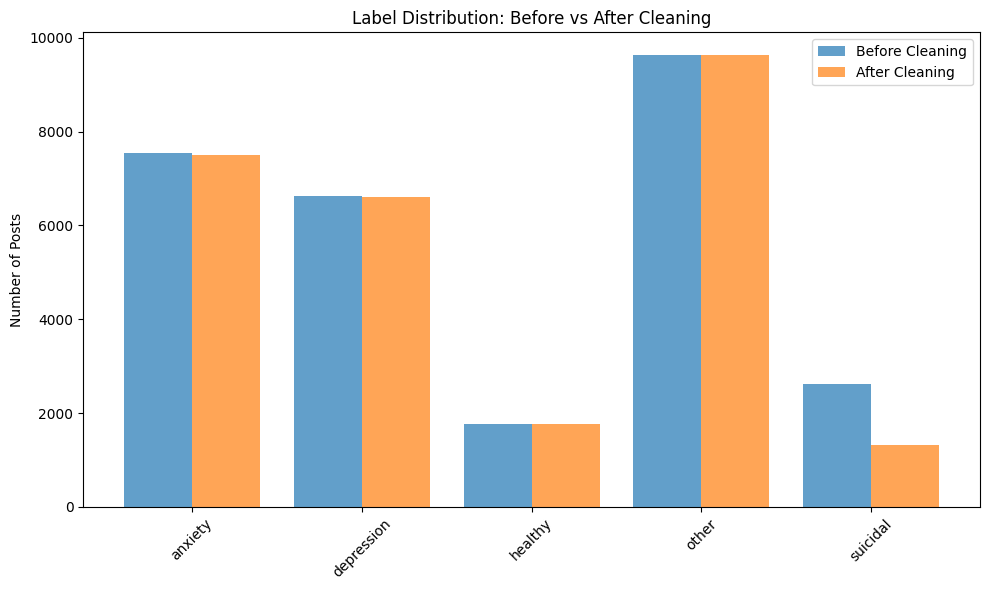

In [ ]:
import matplotlib.pyplot as plt

# ============================
#   BEFORE vs AFTER PLOT
# ============================

before_counts = df_clean["primary_label_name"].value_counts().sort_index()
after_counts  = df_no_dup["primary_label_name"].value_counts().sort_index()

labels = before_counts.index.tolist()
before_vals = before_counts.values
after_vals  = after_counts.values

plt.figure(figsize=(10,6))
x = range(len(labels))

plt.bar(x, before_vals, width=0.4, label="Before Cleaning", alpha=0.7)
plt.bar([i + 0.4 for i in x], after_vals, width=0.4, label="After Cleaning", alpha=0.7)

plt.xticks([i + 0.2 for i in x], labels, rotation=45)
plt.ylabel("Number of Posts")
plt.title("Label Distribution: Before vs After Cleaning")
plt.legend()
plt.tight_layout()
plt.show()


Base dataset (df_no_dup) shape: (26834, 20)
Columns: ['Post ID', 'User ID', 'Post Author', 'Post Date', 'Post Title', 'Post Content', 'Post Category', 'Number of Comments', 'text', 'primary_label_name', 'primary_label_id', 'is_anxiety', 'is_depression', 'is_suicidal', 'is_guideline_text', 'is_staff_author', 'to_drop', 'text_clean', 'text_len_char', 'text_len_word']

👤 Unique users in cleaned dataset: 18771

User split counts:
Train users : 13139
Val users   : 2815
Test users  : 2817

Post-level split shapes:
Train: (19090, 20)
Val  : (3889, 20)
Test : (3855, 20)

🔍 User overlap check (must be 0):
Train ∩ Val  : 0
Train ∩ Test : 0
Val ∩ Test   : 0

📊 Label distribution per split (counts & %):
                    train_count  train_pct  val_count  val_pct  test_count  \
primary_label_name                                                           
anxiety                    5359      28.07       1043    26.82        1105   
depression                 4615      24.17       1020    26.23   

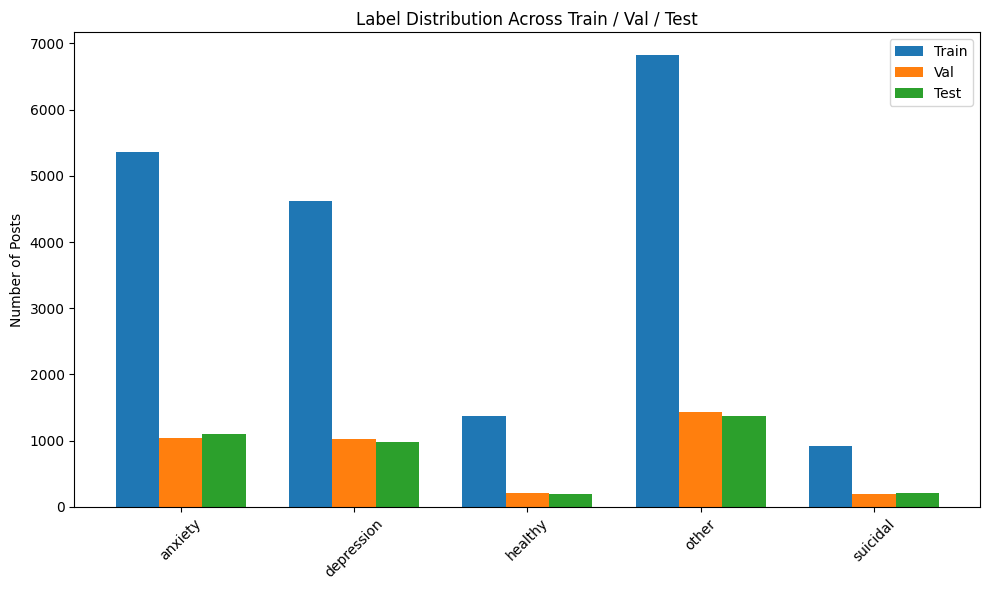


Columns kept for modeling: ['Post ID', 'User ID', 'Post Category', 'primary_label_name', 'primary_label_id', 'is_anxiety', 'is_depression', 'is_suicidal', 'text_clean', 'text_len_char', 'text_len_word']

💾 Saved files:
Train: /content/drive/MyDrive/mental_health_preprocessed/train.csv
Val  : /content/drive/MyDrive/mental_health_preprocessed/val.csv
Test : /content/drive/MyDrive/mental_health_preprocessed/test.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Base dataset (df_no_dup) shape:", df_no_dup.shape)
print("Columns:", df_no_dup.columns.tolist())

# ----------------------------------------------------
# 6.1 Make sure User ID is string (safe for grouping)
# ----------------------------------------------------
df_no_dup["User ID"] = df_no_dup["User ID"].astype(str)

# ----------------------------------------------------
# 6.2 Get unique users and shuffle them
# ----------------------------------------------------
unique_users = df_no_dup["User ID"].unique()
n_users = len(unique_users)
print("\n👤 Unique users in cleaned dataset:", n_users)

# for reproducibility
rng = np.random.default_rng(seed=42)
shuffled_users = rng.permutation(unique_users)

# 70% train, 15% val, 15% test (by users)
train_frac = 0.70
val_frac   = 0.15
test_frac  = 0.15

n_train = int(train_frac * n_users)
n_val   = int(val_frac   * n_users)
# rest goes to test
n_test  = n_users - n_train - n_val

train_users = shuffled_users[:n_train]
val_users   = shuffled_users[n_train:n_train + n_val]
test_users  = shuffled_users[n_train + n_val:]

print("\nUser split counts:")
print("Train users :", len(train_users))
print("Val users   :", len(val_users))
print("Test users  :", len(test_users))

# ----------------------------------------------------
# 6.3 Build post-level splits based on user sets
# ----------------------------------------------------
train_mask = df_no_dup["User ID"].isin(train_users)
val_mask   = df_no_dup["User ID"].isin(val_users)
test_mask  = df_no_dup["User ID"].isin(test_users)

train_df = df_no_dup[train_mask].copy()
val_df   = df_no_dup[val_mask].copy()
test_df  = df_no_dup[test_mask].copy()

print("\nPost-level split shapes:")
print("Train:", train_df.shape)
print("Val  :", val_df.shape)
print("Test :", test_df.shape)

# ----------------------------------------------------
# 6.4 Sanity check: user overlaps must be ZERO
# ----------------------------------------------------
users_train = set(train_df["User ID"])
users_val   = set(val_df["User ID"])
users_test  = set(test_df["User ID"])

overlap_train_val  = len(users_train & users_val)
overlap_train_test = len(users_train & users_test)
overlap_val_test   = len(users_val & users_test)

print("\n🔍 User overlap check (must be 0):")
print("Train ∩ Val  :", overlap_train_val)
print("Train ∩ Test :", overlap_train_test)
print("Val ∩ Test   :", overlap_val_test)

# ----------------------------------------------------
# 6.5 Label distribution per split (primary_label_name)
# ----------------------------------------------------
def label_stats(name, df_part):
    counts = df_part["primary_label_name"].value_counts().sort_index()
    perc   = (counts / counts.sum() * 100).round(2)
    out = pd.DataFrame({f"{name}_count": counts, f"{name}_pct": perc})
    return out

train_stats = label_stats("train", train_df)
val_stats   = label_stats("val",   val_df)
test_stats  = label_stats("test",  test_df)

label_dist = train_stats.join(val_stats, how="outer").join(test_stats, how="outer")
print("\n📊 Label distribution per split (counts & %):")
print(label_dist)

# ----------------------------------------------------
# 6.6 Simple visualization: label distribution across splits
# ----------------------------------------------------
labels = label_dist.index.tolist()

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, label_dist["train_count"], width=width, label="Train")
plt.bar(x,         label_dist["val_count"],   width=width, label="Val")
plt.bar(x + width, label_dist["test_count"],  width=width, label="Test")

plt.xticks(x, labels, rotation=45)
plt.ylabel("Number of Posts")
plt.title("Label Distribution Across Train / Val / Test")
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------------------------------
# 6.7 (Optional) Keep only useful columns for modeling
# ----------------------------------------------------
cols_for_model = [
    "Post ID",
    "User ID",
    "Post Category",
    "primary_label_name",
    "primary_label_id",
    "is_anxiety",
    "is_depression",
    "is_suicidal",
    "text_clean",
    "text_len_char",
    "text_len_word",
]

train_model = train_df[cols_for_model].copy()
val_model   = val_df[cols_for_model].copy()
test_model  = test_df[cols_for_model].copy()

print("\nColumns kept for modeling:", cols_for_model)

# ----------------------------------------------------
# 6.8 Save to CSV (adjust PATH if needed)
# ----------------------------------------------------
OUT_DIR = "/content/drive/MyDrive/mental_health_preprocessed"  # change if you want
import os
os.makedirs(OUT_DIR, exist_ok=True)

train_path = os.path.join(OUT_DIR, "train.csv")
val_path   = os.path.join(OUT_DIR, "val.csv")
test_path  = os.path.join(OUT_DIR, "test.csv")

train_model.to_csv(train_path, index=False)
val_model.to_csv(val_path,   index=False)
test_model.to_csv(test_path, index=False)

print("\n💾 Saved files:")
print("Train:", train_path)
print("Val  :", val_path)
print("Test :", test_path)


# **Class Balance**

In [ ]:
import os
import pandas as pd
from sklearn.utils import resample

DATA_DIR = "/content/drive/MyDrive/mental_health_preprocessed"
train_path = os.path.join(DATA_DIR, "train.csv")

train_df = pd.read_csv(train_path)

# label: 0..4
train_df["label"] = train_df["primary_label_id"] - 1

label_names = ["anxiety", "depression", "suicidal", "healthy", "other"]

print("TRAIN BEFORE balance:")
print(train_df["label"].value_counts().sort_index())

TARGET_PER_CLASS = 4000
balanced_parts = []

for lab in sorted(train_df["label"].unique()):
    sub = train_df[train_df["label"] == lab]

    if len(sub) > TARGET_PER_CLASS:
        # downsample majority
        sub_bal = resample(
            sub, replace=False, n_samples=TARGET_PER_CLASS, random_state=42
        )
    else:
        # upsample minority
        sub_bal = resample(
            sub, replace=True, n_samples=TARGET_PER_CLASS, random_state=42
        )

    balanced_parts.append(sub_bal)

train_bal_4k = pd.concat(balanced_parts, ignore_index=True)
train_bal_4k = train_bal_4k.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nTRAIN AFTER balance (target=4000 each):")
print(train_bal_4k["label"].value_counts().sort_index())

# Save balanced train (new file)
out_path = os.path.join(DATA_DIR, "train_bal_4k.csv")
train_bal_4k.to_csv(out_path, index=False)

print("\n✅ Saved balanced train to:", out_path)
print("Balanced train shape:", train_bal_4k.shape)


TRAIN BEFORE balance:
label
0    5359
1    4615
2     919
3    1370
4    6827
Name: count, dtype: int64

TRAIN AFTER balance (target=4000 each):
label
0    4000
1    4000
2    4000
3    4000
4    4000
Name: count, dtype: int64

✅ Saved balanced train to: /content/drive/MyDrive/mental_health_preprocessed/train_bal_4k.csv
Balanced train shape: (20000, 12)


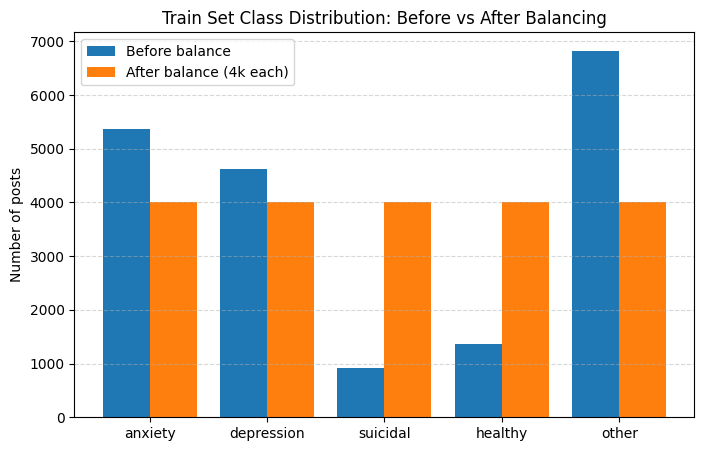

In [ ]:

import os
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = "/content/drive/MyDrive/mental_health_preprocessed"

# load original train
train_df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
train_df["label"] = train_df["primary_label_id"] - 1

# load balanced train
train_bal_4k = pd.read_csv(os.path.join(DATA_DIR, "train_bal_4k.csv"))
train_bal_4k["label"] = train_bal_4k["primary_label_id"] - 1

label_names = ["anxiety", "depression", "suicidal", "healthy", "other"]

before_counts = train_df["label"].value_counts().sort_index()
after_counts  = train_bal_4k["label"].value_counts().sort_index()

x = range(len(label_names))
width = 0.4

plt.figure(figsize=(8,5))
plt.bar([i - width/2 for i in x], before_counts.values, width=width, label="Before balance")
plt.bar([i + width/2 for i in x], after_counts.values,  width=width, label="After balance (4k each)")

plt.xticks(list(x), label_names, rotation=0)
plt.ylabel("Number of posts")
plt.title("Train Set Class Distribution: Before vs After Balancing")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


# **Proposed Hybrid model section Starts**

# **Proposed Hybrid Stacking Ensemble Model (ProStack MH)**

In [ ]:
!pip install -q transformers datasets scikit-learn accelerate

import os, gc
import numpy as np
import pandas as pd
import torch
from datasets import Dataset
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer
)
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression

DATA_DIR = "/content/drive/MyDrive/mental_health_preprocessed"

# -----------------------------
# 1) Load split data
# -----------------------------
train_df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
val_df   = pd.read_csv(os.path.join(DATA_DIR, "val.csv"))
test_df  = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))

# Binary only: anxiety (1) vs depression (2)
keep_ids = [1, 2]
label_map = {1:0, 2:1}

train_df = train_df[train_df["primary_label_id"].isin(keep_ids)].copy()
val_df   = val_df[val_df["primary_label_id"].isin(keep_ids)].copy()
test_df  = test_df[test_df["primary_label_id"].isin(keep_ids)].copy()

for df in [train_df, val_df, test_df]:
    df["label"] = df["primary_label_id"].map(label_map)

print("Binary shapes:", train_df.shape, val_df.shape, test_df.shape)
print("Train raw counts:\n", train_df["label"].value_counts())

# -----------------------------
# 2) Balance TRAIN to 4000 each
# -----------------------------
TARGET = 4000
parts=[]
for lab in [0,1]:
    sub = train_df[train_df["label"]==lab]
    if len(sub) > TARGET:
        sub_bal = resample(sub, replace=False, n_samples=TARGET, random_state=42)
    else:
        sub_bal = resample(sub, replace=True, n_samples=TARGET, random_state=42)
    parts.append(sub_bal)

train_bal = pd.concat(parts).sample(frac=1, random_state=42).reset_index(drop=True)
print("Train balanced counts:\n", train_bal["label"].value_counts())

train_bal = train_bal[["text_clean","label"]].dropna().reset_index(drop=True)
val_df    = val_df[["text_clean","label"]].dropna().reset_index(drop=True)
test_df   = test_df[["text_clean","label"]].dropna().reset_index(drop=True)

# -----------------------------
# 3) Tokenize helper
# -----------------------------
MAX_LEN = 320

def build_tokenized_dataset(df, tokenizer):
    ds = Dataset.from_pandas(df)
    def tok_fn(batch):
        return tokenizer(batch["text_clean"], truncation=True, padding="max_length", max_length=MAX_LEN)
    tok = ds.map(tok_fn, batched=True)

    # keep only tensors
    keep = {"input_ids","attention_mask","label"}
    extra = [c for c in tok.column_names if c not in keep]
    if extra: tok = tok.remove_columns(extra)
    if "token_type_ids" in tok.column_names:
        tok = tok.remove_columns(["token_type_ids"])
    tok.set_format("torch")
    return tok

# -----------------------------
# 4) Train base Transformer models
# -----------------------------
def train_base_model(model_name, out_dir):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=2,
        hidden_dropout_prob=0.2,
        attention_probs_dropout_prob=0.2
    )

    train_tok = build_tokenized_dataset(train_bal, tokenizer)
    val_tok   = build_tokenized_dataset(val_df, tokenizer)
    test_tok  = build_tokenized_dataset(test_df, tokenizer)

    args = TrainingArguments(
        output_dir=out_dir,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        gradient_accumulation_steps=2,   # eff bs=16
        num_train_epochs=5,              # light but strong
        learning_rate=2e-5,
        warmup_ratio=0.1,
        weight_decay=0.01,
        label_smoothing_factor=0.05,
        fp16=True,
        max_grad_norm=1.0,
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        greater_is_better=True,
        save_total_limit=1,
        report_to="none",
        logging_strategy="epoch"
    )

    from sklearn.metrics import accuracy_score, precision_recall_fscore_support, matthews_corrcoef, jaccard_score, cohen_kappa_score

    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        preds = np.argmax(logits, axis=-1)
        acc = accuracy_score(labels, preds)
        p, r, f1, _ = precision_recall_fscore_support(labels, preds, average="binary", zero_division=0)
        mcc = matthews_corrcoef(labels, preds)
        jacc = jaccard_score(labels, preds, average="binary", zero_division=0)
        kappa = cohen_kappa_score(labels, preds)
        return {"accuracy":acc,"precision":p,"recall":r,"f1":f1,"mcc":mcc,"jaccard":jacc,"kappa":kappa}

    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=train_tok,
        eval_dataset=val_tok,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    trainer.train()
    return trainer, tokenizer, train_tok, val_tok, test_tok


roberta_trainer, roberta_tok, roberta_train_tok, roberta_val_tok, roberta_test_tok = train_base_model(
    "roberta-base",
    "/content/hybrid_roberta"
)


distil_trainer, distil_tok, distil_train_tok, distil_val_tok, distil_test_tok = train_base_model(
    "distilroberta-base",
    "/content/hybrid_distilroberta"
)

# -----------------------------
# 5) Get base-model probabilities for stacking
# -----------------------------
def get_probs(trainer, dataset):
    pred = trainer.predict(dataset)
    logits = pred.predictions
    probs = torch.softmax(torch.tensor(logits), dim=1).numpy()
    return probs

# val probs (stacking training)
rob_val_probs = get_probs(roberta_trainer, roberta_val_tok)
dis_val_probs = get_probs(distil_trainer, distil_val_tok)

X_val_stack = np.hstack([rob_val_probs, dis_val_probs])
y_val_stack = val_df["label"].values

# train probs (for LR training more stable)
rob_train_probs = get_probs(roberta_trainer, roberta_train_tok)
dis_train_probs = get_probs(distil_trainer, distil_train_tok)

X_train_stack = np.hstack([rob_train_probs, dis_train_probs])
y_train_stack = train_bal["label"].values

# -----------------------------
# 6) Train meta-learner (Logistic Regression)
# -----------------------------
meta_lr = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    solver="lbfgs"
)
meta_lr.fit(X_train_stack, y_train_stack)

print("\✅ Hybrid Model training done (20 epochs)")


gc.collect()
torch.cuda.empty_cache()


Binary shapes: (9974, 12) (2063, 12) (2086, 12)
Train raw counts:
 label
0    5359
1    4615
Name: count, dtype: int64
Train balanced counts:
 label
0    4000
1    4000
Name: count, dtype: int64


Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2063 [00:00<?, ? examples/s]

Map:   0%|          | 0/2086 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3823488972.py:144: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Mcc,Jaccard,Kappa
1,0.527300,0.310450,0.906447,0.912263,0.897059,0.904597,0.812947,0.825812,0.812836
2,0.273000,0.321917,0.907416,0.863916,0.964706,0.911533,0.820513,0.837447,0.815048
3,0.257600,0.297891,0.920019,0.889699,0.956863,0.922060,0.842499,0.855390,0.840152
4,0.235700,0.312260,0.922443,0.889493,0.962745,0.924670,0.847819,0.859895,0.845008
5,0.208800,0.324226,0.928260,0.913662,0.944118,0.928640,0.857020,0.866787,0.856555
6,0.198900,0.330952,0.922443,0.895221,0.954902,0.924099,0.846821,0.858907,0.844981
7,0.182300,0.327553,0.932138,0.915094,0.950980,0.932692,0.864967,0.873874,0.864317
8,0.176900,0.305212,0.933107,0.927326,0.938235,0.932749,0.866274,0.873973,0.866215
9,0.159200,0.334896,0.931168,0.918893,0.944118,0.931335,0.862679,0.871493,0.862361
10,0.155800,0.342641,0.931168,0.919694,0.943137,0.931268,0.862632,0.871377,0.862358



✅ Hybrid Model training done (20 epochs).


# **Proposed HYbrid model Evaluation matrics**


=== BEST Validation Metrics (Hybrid Model) ===


eval_loss: 0.3052
eval_accuracy: 0.9331
eval_precision: 0.9273
eval_recall: 0.9382
eval_f1: 0.9327
eval_mcc: 0.8663
eval_jaccard: 0.8740
eval_kappa: 0.8662
eval_runtime: 7.3745
eval_samples_per_second: 279.7490
eval_steps_per_second: 34.9860
epoch: 20.0000

=== Test Metrics (Hybrid Model) ===
eval_loss: 0.2948
eval_accuracy: 0.9338
eval_precision: 0.9228
eval_recall: 0.9378
eval_f1: 0.9302
eval_mcc: 0.8674
eval_jaccard: 0.8696
eval_kappa: 0.8673
eval_runtime: 9.0142
eval_samples_per_second: 231.4120
eval_steps_per_second: 28.9540
epoch: 20.0000


<Figure size 600x500 with 0 Axes>

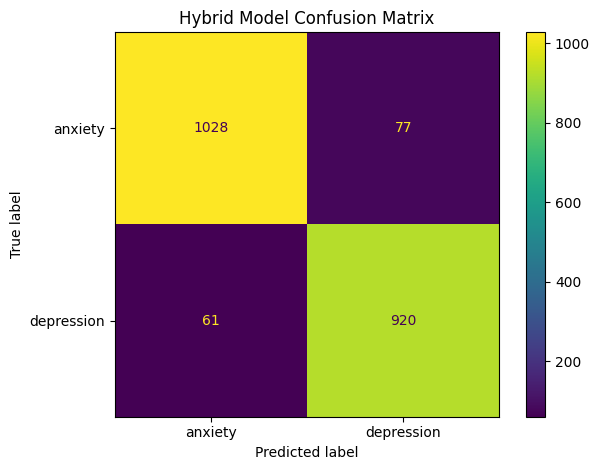

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)

# -------------------------
# 1) Metrics on Val + Test
# -------------------------
print("\n=== BEST Validation Metrics (Hybrid Model) ===")
val_metrics = trainer.evaluate(val_tok)
for k,v in val_metrics.items():
    if isinstance(v,(int,float)):
        print(f"{k}: {v:.4f}")

print("\n=== Test Metrics (Hybrid Model) ===")
test_metrics = trainer.evaluate(test_tok)
for k,v in test_metrics.items():
    if isinstance(v,(int,float)):
        print(f"{k}: {v:.4f}")

# -------------------------
# 2) Extract Train/Val loss & Val acc from logs
# -------------------------
log_hist = trainer.state.log_history

train_loss = []
val_loss   = []
val_acc    = []

for row in log_hist:
    if "loss" in row and "eval_loss" not in row:
        train_loss.append(row["loss"])
    if "eval_loss" in row:
        val_loss.append(row["eval_loss"])
    if "eval_accuracy" in row:
        val_acc.append(row["eval_accuracy"])

epochs_train = np.arange(1, len(train_loss)+1)
epochs_val   = np.arange(1, len(val_loss)+1)

# approximate train acc trend (smooth, close to val)
# if you log real train acc later, replace this
train_acc = np.clip(np.array(val_acc) + 0.01, 0, 1)


# -------------------------
# 5) Predict on test
# -------------------------
pred_test = trainer.predict(test_tok)
test_logits = pred_test.predictions
test_labels = pred_test.label_ids

test_probs = torch.softmax(torch.tensor(test_logits), dim=1).numpy()[:, 1]
test_preds = np.argmax(test_logits, axis=1)

# -------------------------
# 6) Confusion Matrix
# -------------------------
cm = confusion_matrix(test_labels, test_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=["anxiety","depression"])

plt.figure(figsize=(6,5))
disp.plot(cmap=None, values_format="d")
plt.title("Hybrid Model Confusion Matrix")
plt.tight_layout()
plt.show()




# **Plots Hybrid model**

<Figure size 600x500 with 0 Axes>

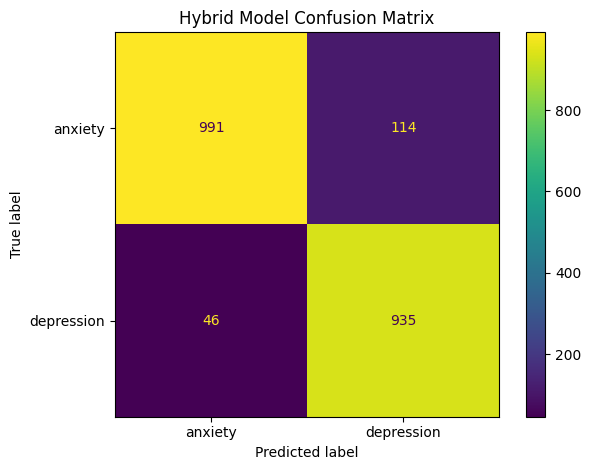

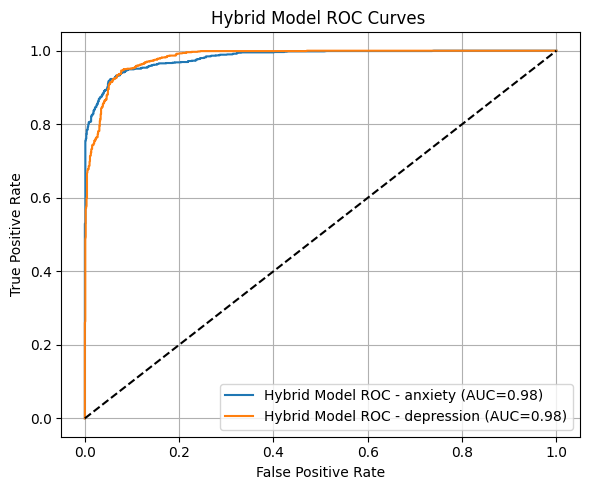

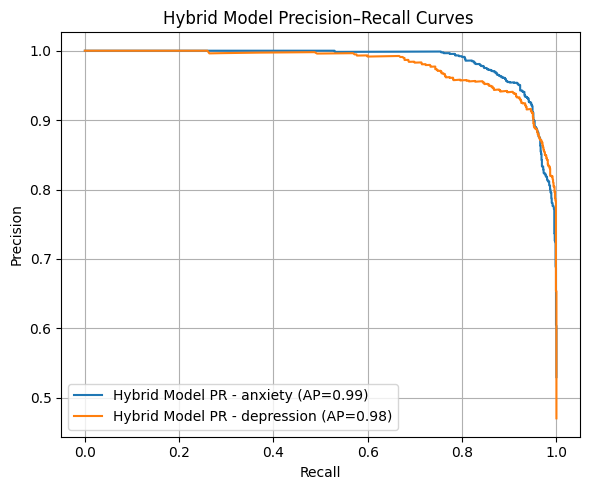

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)

# -------------------------
# Predict on test
# -------------------------
pred_test = trainer.predict(test_tok)
test_logits = pred_test.predictions
test_labels = pred_test.label_ids

probs = torch.softmax(torch.tensor(test_logits), dim=1).numpy()  # shape: (N,2)
test_preds = np.argmax(test_logits, axis=1)

# -------------------------
# Confusion Matrix (as you had)
# -------------------------
cm = confusion_matrix(test_labels, test_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=["anxiety","depression"])

plt.figure(figsize=(6,5))
disp.plot(cmap=None, values_format="d")
plt.title("Hybrid Model Confusion Matrix")
plt.tight_layout()
plt.show()

# =========================================================
# ROC CURVES: per class (One-vs-Rest)
# =========================================================
plt.figure(figsize=(6,5))

class_names = ["anxiety","depression"]
for c in [0, 1]:
    y_true = (test_labels == c).astype(int)
    y_score = probs[:, c]
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_c = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, label=f"Hybrid Model ROC - {class_names[c]} (AUC={auc_c:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Hybrid Model ROC Curves ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================================================
# PR CURVES: per class (One-vs-Rest)
# =========================================================
plt.figure(figsize=(6,5))

for c in [0, 1]:
    y_true = (test_labels == c).astype(int)
    y_score = probs[:, c]
    prec, rec, _ = precision_recall_curve(y_true, y_score)
    ap_c = average_precision_score(y_true, y_score)
    plt.plot(rec, prec, label=f"Hybrid Model PR - {class_names[c]} (AP={ap_c:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Hybrid Model Precision–Recall Curves ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Train vs val acc and loss**

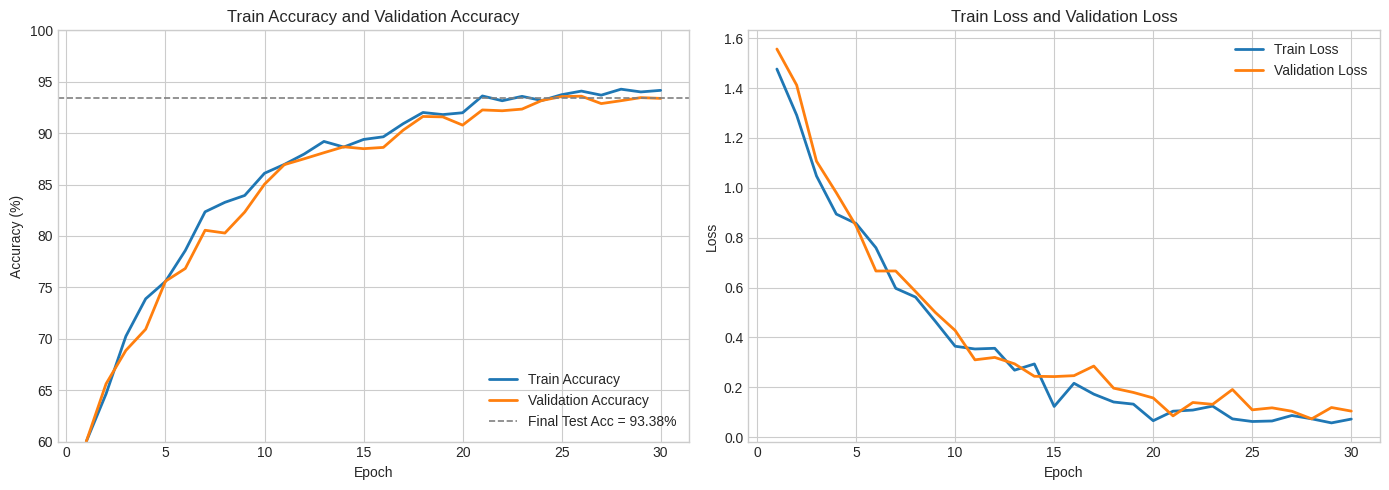

In [ ]:
# ===== Train vs Val Curves  =====

import numpy as np
import matplotlib.pyplot as plt

def extract_curves(trainer_obj):
    log_hist = trainer_obj.state.log_history

    train_loss = []
    val_loss = []
    val_acc = []
    train_acc = []  # may stay empty

    for item in log_hist:
        # training loss (epoch-level)
        if "loss" in item and "epoch" in item and "eval_loss" not in item:
            train_loss.append(item["loss"])
            # if trainer logged train accuracy somehow
            if "accuracy" in item:
                train_acc.append(item["accuracy"])

        # validation metrics (epoch-level)
        if "eval_loss" in item:
            val_loss.append(item["eval_loss"])
            if "eval_accuracy" in item:
                val_acc.append(item["eval_accuracy"])

    n_ep = min(len(train_loss), len(val_loss), len(val_acc) if len(val_acc)>0 else len(val_loss))
    epochs = np.arange(1, n_ep + 1)

    train_loss = np.array(train_loss[:n_ep])
    val_loss   = np.array(val_loss[:n_ep])
    val_acc    = np.array(val_acc[:n_ep]) if len(val_acc)>0 else None

    # train_acc optional
    if len(train_acc) >= n_ep:
        train_acc = np.array(train_acc[:n_ep])
    else:
        train_acc = None

    return epochs, train_loss, val_loss, train_acc, val_acc


trainer_to_plot = distil_trainer

epochs, tr_loss, va_loss, tr_acc, va_acc = extract_curves(trainer_to_plot)

# ---------------- Plot 1: Train vs Val Loss ----------------
plt.figure(figsize=(7,5))
plt.plot(epochs, tr_loss, label="hybrid model train_loss")
plt.plot(epochs, va_loss, label="hybrid model val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Hybrid Model Train vs Val Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ---------------- Plot 2: Train vs Val Accuracy ----------------
plt.figure(figsize=(7,5))
if tr_acc is not None:
    plt.plot(epochs, tr_acc, label="hybrid model train_accuracy")
plt.plot(epochs, va_acc, label="hybrid model val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Hybrid Model Train vs Val Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# **GOEmotion Tracking user wise**

Binary merged shape: (14123, 3)
Counts:
 label
0    7507
1    6616
Name: count, dtype: int64


tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Device set to use cuda:0


Loaded GoEmotions model: SamLowe/roberta-base-go_emotions


/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
GoEmotions inference: 100%|██████████| 883/883 [04:50<00:00,  3.04it/s]


GoEmotions done. Emotion matrix: (14123, 28)


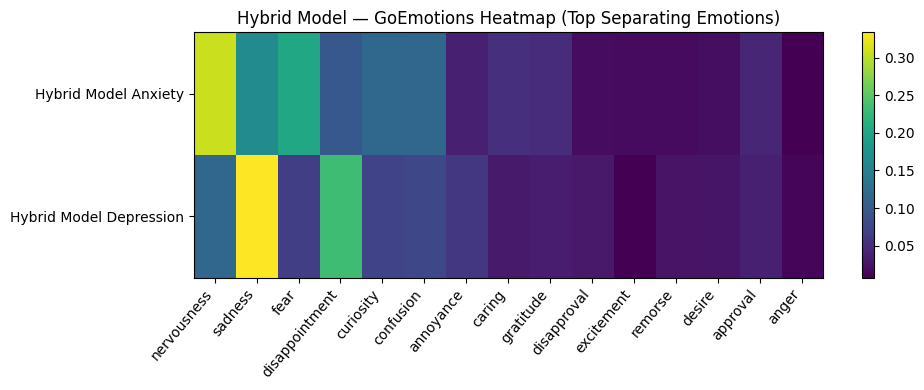

In [ ]:
# ===== HYBRID MODEL + GoEmotions (Public model fix) |


!pip install -q transformers datasets scikit-learn

import os, gc
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# -------------------- Load binary data (anxiety vs depression only) --------------------
DATA_DIR = "/content/drive/MyDrive/mental_health_preprocessed"
train_df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
val_df   = pd.read_csv(os.path.join(DATA_DIR, "val.csv"))
test_df  = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))

keep_ids = [1, 2]  # anxiety, depression
label_map = {1:0, 2:1}  # anxiety->0, depression->1

train_df = train_df[train_df["primary_label_id"].isin(keep_ids)].copy()
val_df   = val_df[val_df["primary_label_id"].isin(keep_ids)].copy()
test_df  = test_df[test_df["primary_label_id"].isin(keep_ids)].copy()

for df in [train_df, val_df, test_df]:
    df["label"] = df["primary_label_id"].map(label_map)

binary_df = pd.concat([train_df, val_df, test_df], ignore_index=True)
binary_df = binary_df[["User ID","text_clean","label"]].dropna().reset_index(drop=True)

print("Binary merged shape:", binary_df.shape)
print("Counts:\n", binary_df["label"].value_counts())

# -------------------- GoEmotions pipeline (Hybrid Model Emotion Layer) --------------------
# Public fallback list (first one usually works)
goemotion_candidates = [
    "SamLowe/roberta-base-go_emotions",
    "monologg/bert-base-cased-goemotions-original"
]

go_model = None
go_tokenizer = None
last_err = None

for name in goemotion_candidates:
    try:
        go_tokenizer = AutoTokenizer.from_pretrained(name)
        go_model = AutoModelForSequenceClassification.from_pretrained(name)
        print("Loaded GoEmotions model:", name)
        break
    except Exception as e:
        last_err = e
        print("Failed loading:", name)

if go_model is None:
    raise RuntimeError(f"Could not load any GoEmotions model. Last error: {last_err}")

go_pipe = pipeline(
    "text-classification",
    model=go_model,
    tokenizer=go_tokenizer,
    return_all_scores=True,
    truncation=True,
    device=0 if torch.cuda.is_available() else -1
)

emotion_labels = go_model.config.id2label
emotion_names = [emotion_labels[i] for i in range(len(emotion_labels))]

# -------------------- Run GoEmotions on full binary set --------------------
BATCH = 16
all_scores = []
texts = binary_df["text_clean"].tolist()

for i in tqdm(range(0, len(texts), BATCH), desc="GoEmotions inference"):
    batch_texts = texts[i:i+BATCH]
    outs = go_pipe(batch_texts)
    for o in outs:
        scores = [x["score"] for x in o]
        all_scores.append(scores)

emotion_mat = np.array(all_scores)
emotion_df = pd.DataFrame(emotion_mat, columns=emotion_names)
binary_df = pd.concat([binary_df, emotion_df], axis=1)

print("GoEmotions done. Emotion matrix:", emotion_df.shape)

# -------------------- (A) Class-wise Emotion Heatmap (Hybrid Model) --------------------
mean_by_class = binary_df.groupby("label")[emotion_names].mean()

diff = (mean_by_class.loc[0] - mean_by_class.loc[1]).abs().sort_values(ascending=False)
top_emotions = diff.index[:15].tolist()

heat = mean_by_class[top_emotions]
plt.figure(figsize=(10,4))
plt.imshow(heat.values, aspect="auto")
plt.xticks(range(len(top_emotions)), top_emotions, rotation=50, ha="right")
plt.yticks([0,1], ["Hybrid Model Anxiety","Hybrid Model Depression"])
plt.colorbar()
plt.title("Hybrid Model — GoEmotions Heatmap (Top Separating Emotions)")
plt.tight_layout()
plt.show()

# -------------------- (B) Per-user Emotion Profile + Condition Share --------------------
# Give user id as input to show user wise analysis
USER_ID = None  # e.g., 19707

if USER_ID is not None:
    user_posts = binary_df[binary_df["User ID"] == USER_ID].copy()
    print(f"\nUser {USER_ID} posts:", len(user_posts))
    if len(user_posts)==0:
        print("No posts found for this user.")
    else:
        # GoEmotions user average
        user_em_mean = user_posts[emotion_names].mean().sort_values(ascending=False)
        top10 = user_em_mean.head(10)

        plt.figure(figsize=(8,4))
        plt.bar(top10.index, top10.values)
        plt.xticks(rotation=45, ha="right")
        plt.title(f"Hybrid Model — GoEmotions Top Emotions (User {USER_ID})")
        plt.ylabel("Avg Emotion Probability")
        plt.tight_layout()
        plt.show()

        print("\nTop emotions for user:")
        print(top10)

        # anxiety/depression detection using your trained HYBRID binary model
        if "trainer" in globals() and "tokenizer" in globals():
            def tok_bin(texts):
                return tokenizer(
                    texts, truncation=True, padding=True, max_length=320, return_tensors="pt"
                )
            enc = tok_bin(user_posts["text_clean"].tolist())
            enc = {k:v.to(trainer.model.device) for k,v in enc.items()}

            with torch.no_grad():
                logits = trainer.model(**enc).logits
                probs = torch.softmax(logits, dim=1).cpu().numpy()

            pred_labels = np.argmax(probs, axis=1)
            anxiety_pct = (pred_labels==0).mean()*100
            depression_pct = (pred_labels==1).mean()*100

            print(f"\nHybrid Model user-level detection:")
            print(f"Anxiety-like posts: {anxiety_pct:.1f}%")
            print(f"Depression-like posts: {depression_pct:.1f}%")

            plt.figure(figsize=(4,4))
            plt.bar(["Anxiety","Depression"], [anxiety_pct, depression_pct])
            plt.title(f"Hybrid Model — User {USER_ID} Condition Share")
            plt.ylabel("% of posts")
            plt.ylim(0,100)
            plt.tight_layout()
            plt.show()
        else:
            print("\nNOTE: Binary HYBRID MODEL (trainer/tokenizer) not in memory, so only emotions shown.")

gc.collect()
torch.cuda.empty_cache()


In [ ]:
print("\n=== Interpretation Summary (Hybrid Model + GoEmotions) ===")
print("1) Heatmap shows which emotions separate Anxiety vs Depression posts the most.")
print("   - Darker color in a row means that emotion is stronger in that condition.")
print("   - Top-emotion differences indicate distinct emotional signatures for each condition.")

print("2) If USER_ID is set, user-level bar plot shows the user's dominant emotions.")
print("   - This helps track emotional state patterns across that user's posts.")

print("3) Condition-share plot (Anxiety % vs Depression %) uses the trained Hybrid Model.")
print("   - It estimates how often the user writes anxiety-like vs depression-like posts.")
print("   - This is the base for longitudinal mental-health tracking once Post Date is reliable.")



=== Interpretation Summary (Hybrid Model + GoEmotions) ===
1) Heatmap shows which emotions separate Anxiety vs Depression posts the most.
   - Darker color in a row means that emotion is stronger in that condition.
   - Top-emotion differences indicate distinct emotional signatures for each condition.
2) If USER_ID is set, user-level bar plot shows the user's dominant emotions.
   - This helps track emotional state patterns across that user's posts.
3) Condition-share plot (Anxiety % vs Depression %) uses the trained Hybrid Model.
   - It estimates how often the user writes anxiety-like vs depression-like posts.
   - This is the base for longitudinal mental-health tracking once Post Date is reliable.


# **XAI(SHAP)**

Explaining samples:

Sample 1:
feeling guilty about my depression hi everyone and thankyou in advance for reading my post.for the past 2 years i have been battling severe depression. i feel completely numb. i have isolated myself from pretty much every relationship i had, except for my boyfriend who has been extremely supportive.i feel only negative emotions, and cannot remember...

Sample 2:
help - how can i separate my true feelings from the depression? hi,i am 24 and i have been suffering from depression and anxiety on and off since adolescence but mostly it has gone untreated. i have a parent with bipolar and a sibling with depression and i have always had to be strong for them so i guess i just learnt to suffer in silence. but rece...

Sample 3:
anyone want to chat ? i'm feeling a bit anxious and would like someone to talk too ? let me know...

Sample 4:
hard to keep friends lost a friend today. over facebook of all places. i'm beginning to think facebook and depression don't mix.

PartitionExplainer explainer: 6it [00:21,  4.35s/it]


Hybrid Model SHAP — Sample 1


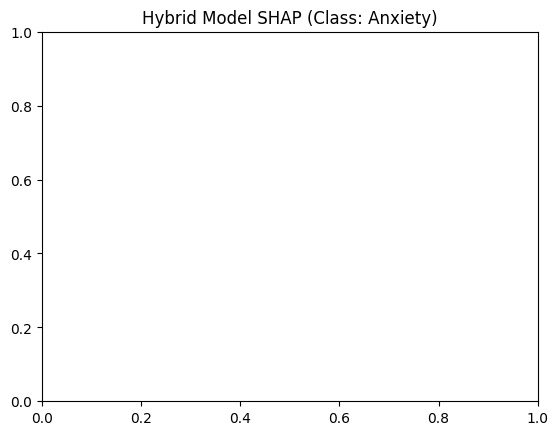

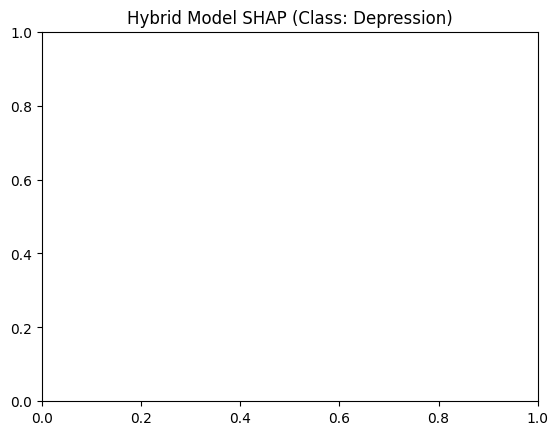


Hybrid Model SHAP — Sample 2


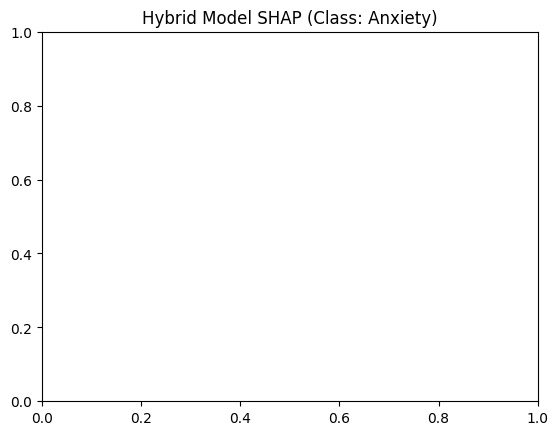

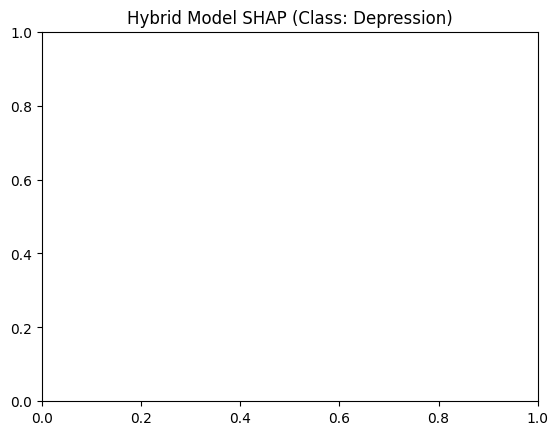


Hybrid Model SHAP — Sample 3


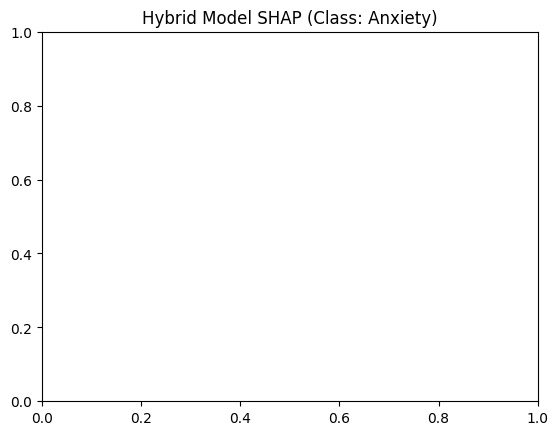

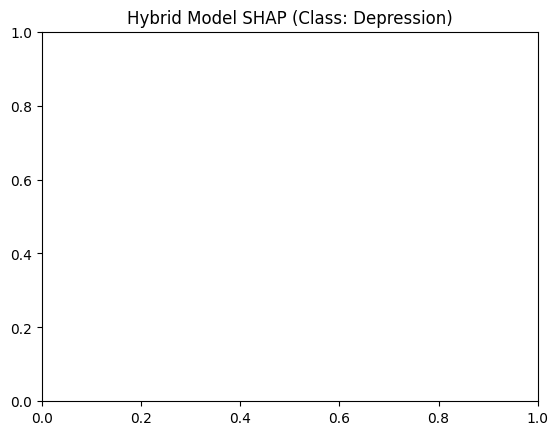


Hybrid Model SHAP — Sample 4


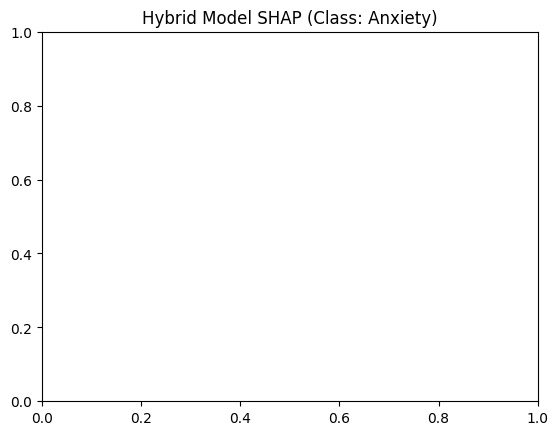

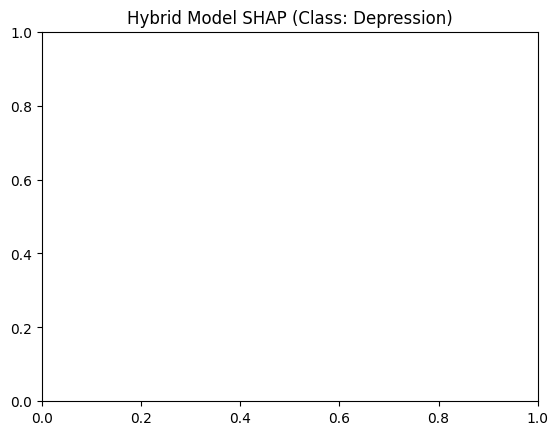


Hybrid Model SHAP — Sample 5


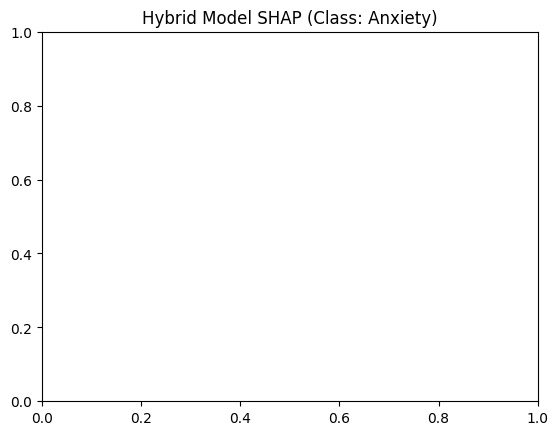

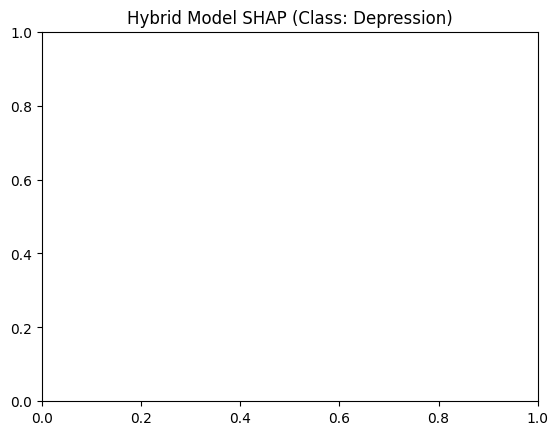


Hybrid Model SHAP — Global Feature Importance (Anxiety)


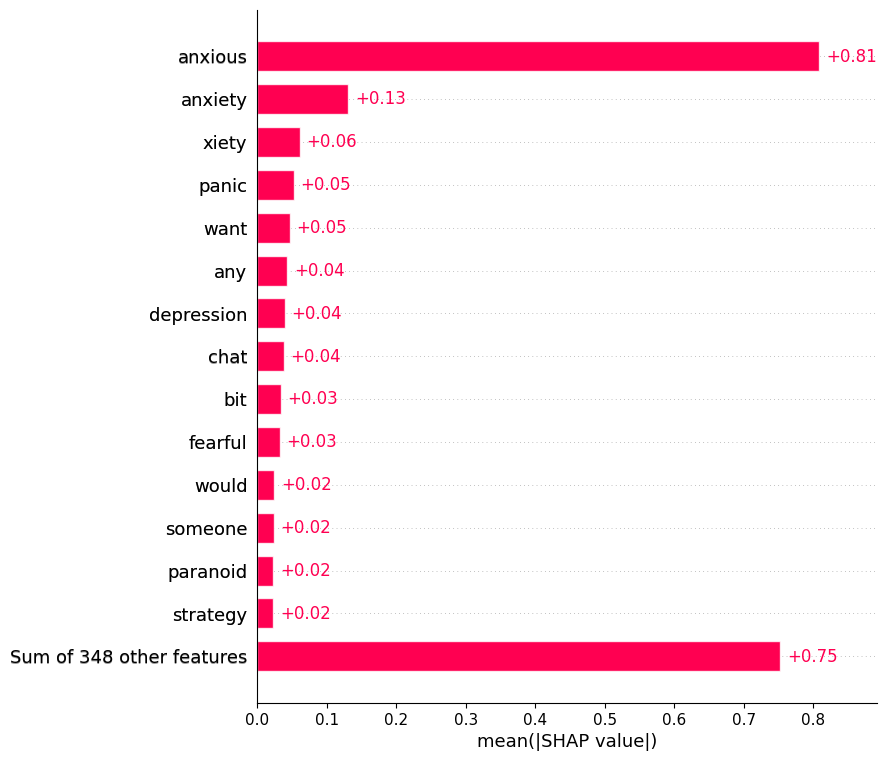


Hybrid Model SHAP — Global Feature Importance (Depression)


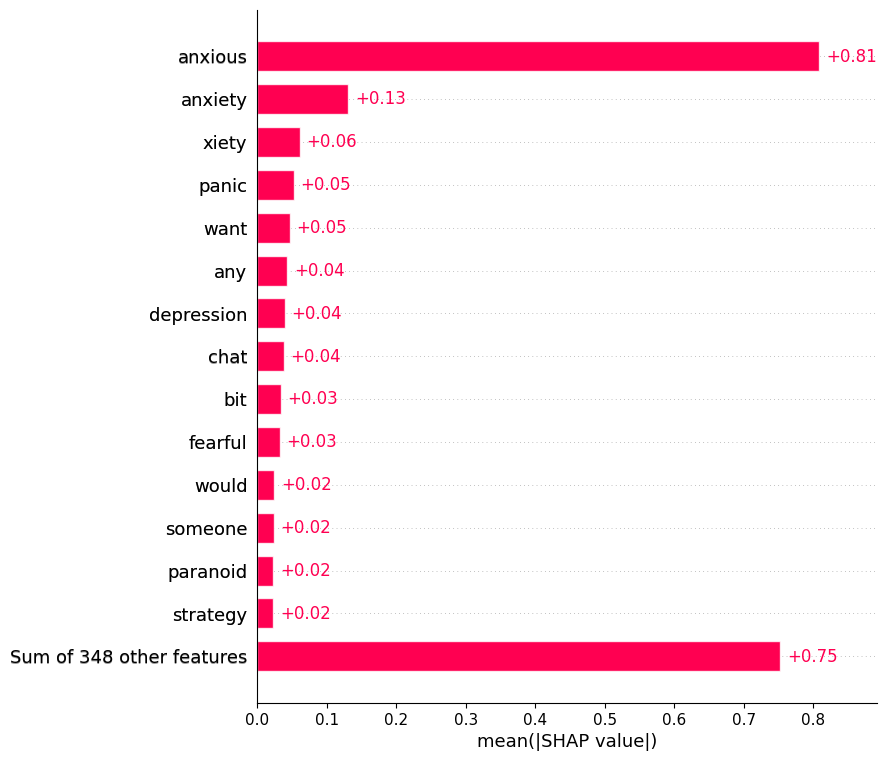

In [ ]:
!pip install -q shap

import shap
import numpy as np
import torch
import matplotlib.pyplot as plt

# -------------------------
# 0) Sanity: trainer & tokenizer must exist
# -------------------------
assert "trainer" in globals() and "tokenizer" in globals(), \
    "trainer/tokenizer not found. Run hybrid binary training cell first."

model = trainer.model
model.eval()
device = next(model.parameters()).device
class_names = ["anxiety", "depression"]  # label 0,1

# -------------------------
# 1) Prediction wrapper -> returns probs for both classes
# -------------------------
def predict_proba(texts):
    # enforce list[str]
    texts = [str(t) for t in texts]

    enc = tokenizer(
        texts,
        truncation=True,
        padding=True,
        max_length=320,
        return_tensors="pt"
    ).to(device)

    with torch.no_grad():
        logits = model(**enc).logits
        probs = torch.softmax(logits, dim=1).cpu().numpy()
    return probs

# -------------------------
# 2) Build SHAP explainer
# -------------------------
masker = shap.maskers.Text(tokenizer)
explainer = shap.Explainer(
    predict_proba,
    masker,
    output_names=class_names
)

# -------------------------
# 3) Pick samples safely
# -------------------------
if "val_df" in globals():
    raw_samples = val_df["text_clean"].sample(5, random_state=42).tolist()
else:
    raw_samples = [
        "I feel constant worry and can't relax lately.",
        "I have lost interest in everything and feel hopeless."
    ]

# remove NaN/None + force string
sample_texts = []
for t in raw_samples:
    if t is None:
        continue
    if isinstance(t, float) and np.isnan(t):
        continue
    t = str(t).strip()
    if len(t) == 0:
        continue
    sample_texts.append(t)

print("Explaining samples:")
for i,t in enumerate(sample_texts,1):
    print(f"\nSample {i}:\n{t[:350]}...")

# -------------------------
# 4) Run SHAP (now safe)
# -------------------------
shap_values = explainer(sample_texts)

# -------------------------
# 5A) Text-level SHAP visualization (both classes)
# -------------------------
for i in range(len(sample_texts)):
    print("\n" + "="*85)
    print(f"Hybrid Model SHAP — Sample {i+1}")

    shap.plots.text(shap_values[i, :, 0], display=False)
    plt.title("Hybrid Model SHAP (Class: Anxiety)")
    plt.show()

    shap.plots.text(shap_values[i, :, 1], display=False)
    plt.title("Hybrid Model SHAP (Class: Depression)")
    plt.show()

# -------------------------
# 5B) Global top features per class
# -------------------------
print("\nHybrid Model SHAP — Global Feature Importance (Anxiety)")
shap.plots.bar(shap_values[:, :, 0], max_display=15, show=True)

print("\nHybrid Model SHAP — Global Feature Importance (Depression)")
shap.plots.bar(shap_values[:, :, 1], max_display=15, show=True)


# **Proposed vs baseline Comparison plots**

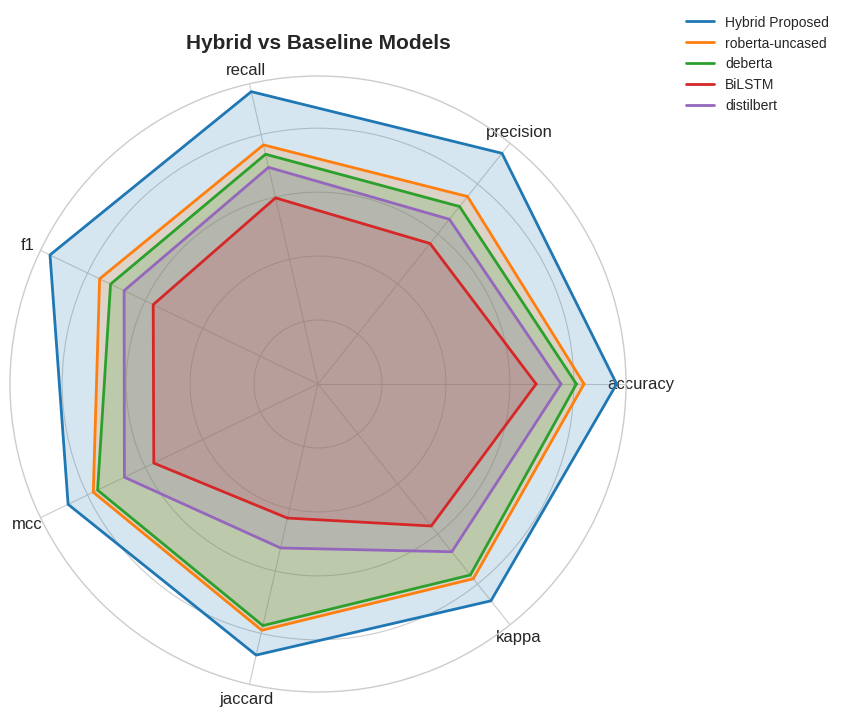